In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [ ]:
df=pd.read_csv('gender_submission.csv')
df=pd.read_csv('test.csv')
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

In [ ]:
df.size

10692

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean, median, or drop rows/columns)
# Example: Fill missing age values with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Convert data types if needed
# Example: Convert 'Fare' to integer
# df['Fare'] = df['Fare'].astype(int)

# Explore and handle outliers
# Example: Use box plots to identify outliers in 'Fare'
# sns.boxplot(x=df['Fare'])
# plt.show()

# Remove or transform outliers (e.g., using IQR or Z-score)
# Example: Remove rows where 'Fare' is greater than a certain threshold
# df = df[df['Fare'] < 300]

# ... (Further data cleaning steps as needed)

# After cleaning, check the data again
df.info()
df.describe()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Convert 'Fare' to integer
df['Fare'] = df['Fare'].astype(int)

# Convert 'Age' to integer
df['Age'] = df['Age'].astype(int)

In [ ]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,724,0,2,"Hodges, Mr. Henry Price",male,50,0,0,250643,13,NaN,S
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45,0,0,113784,35,T,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16,1,1,C.A. 2673,20,NaN,S


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,int64


In [ ]:
# Drop columns 'Parch', 'SibSp', and 'Cabin'
df = df.drop(['Parch', 'SibSp', 'Cabin'], axis=1)

In [ ]:
df = df.rename(columns={'Embarked': 'target'})

In [ ]:
print(df['target'].unique())

['S' 'C' 'Q' nan]


In [ ]:
print(df['target'].isnull().sum())

2


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(889, 9)

In [ ]:
df.dropna(subset=['target'], inplace=True)

In [ ]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,target
536,537,0,1,"Butt, Major. Archibald Willingham",male,45,113050,26,S
108,109,0,3,"Rekic, Mr. Tido",male,38,349249,7,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,PC 17558,247,C


In [ ]:
print(df['target'].unique())

['S' 'C' 'Q']


In [ ]:
df.shape

(889, 9)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.498313,31.677165
std,256.998173,0.486260,0.834700,12.979638,49.706915
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,7.000000
50%,446.000000,0.000000,3.000000,29.000000,14.000000
75%,668.000000,1.000000,3.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.000000


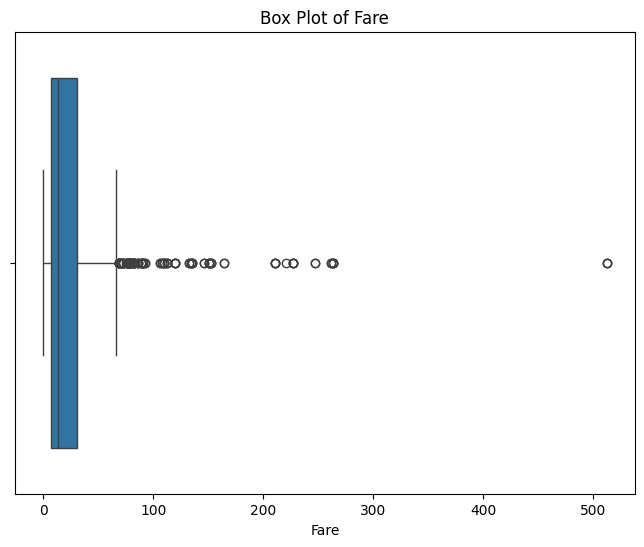

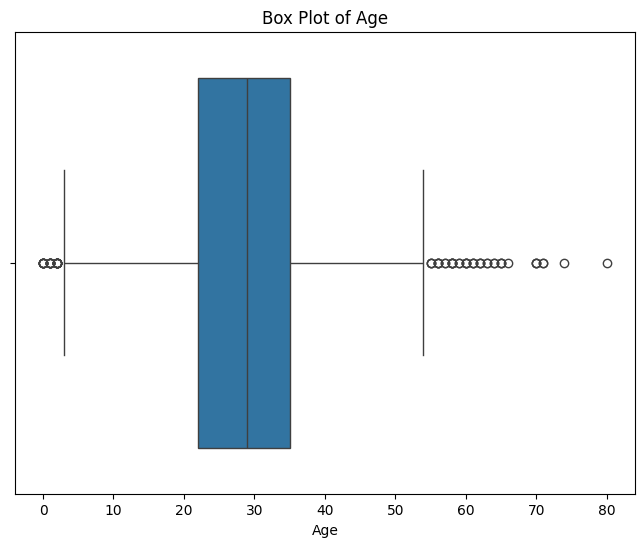

In [ ]:
# Assuming you want a box plot for the 'Fare' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.show()

# Or, if you want a box plot for 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()


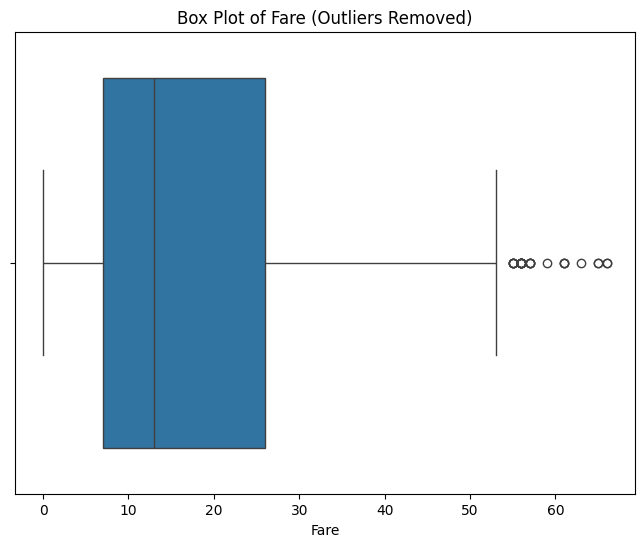

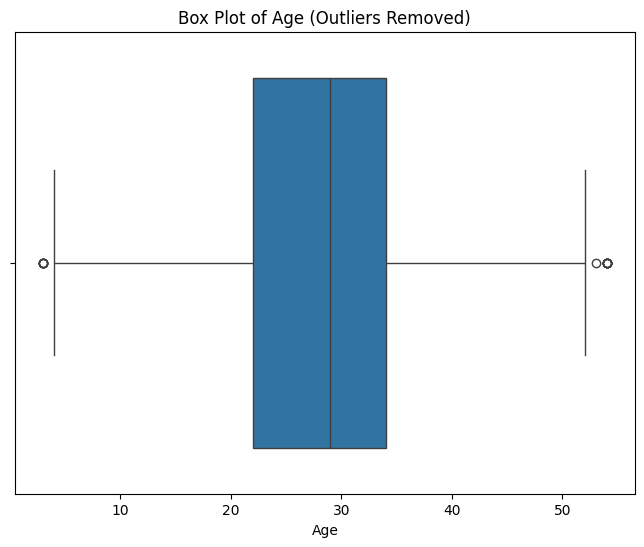

In [ ]:
# Calculate the IQR for 'Fare'
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Define the lower and upper bounds for outliers
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Remove outliers based on the bounds
df_no_outliers_fare = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

# Calculate the IQR for 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the lower and upper bounds for outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Remove outliers based on the bounds
df_no_outliers_age = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]


# You can now work with df_no_outliers_fare or df_no_outliers_age, which have outliers removed.

# Example: Plot the box plot for 'Fare' without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers_fare['Fare'])
plt.title('Box Plot of Fare (Outliers Removed)')
plt.show()


# Example: Plot the box plot for 'Age' without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers_age['Age'])
plt.title('Box Plot of Age (Outliers Removed)')
plt.show()


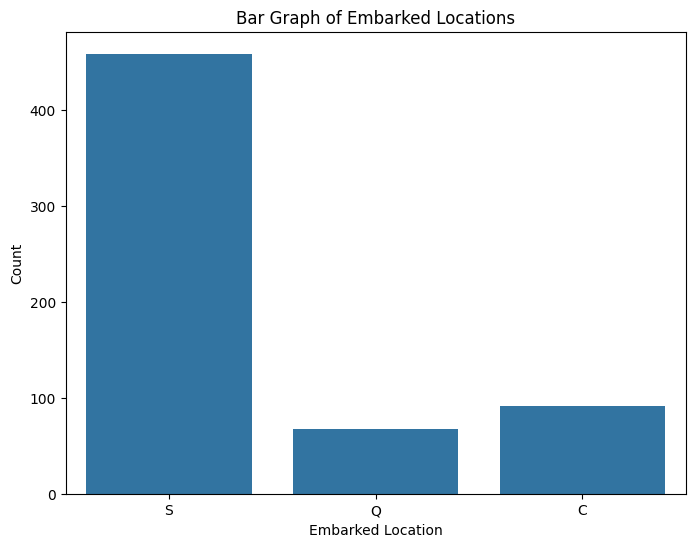

In [ ]:
# Bar graph for 'Embarked' (target) column
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)  # Changed 'Embarked' to 'target' because the column was renamed
plt.title('Bar Graph of Embarked Locations')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

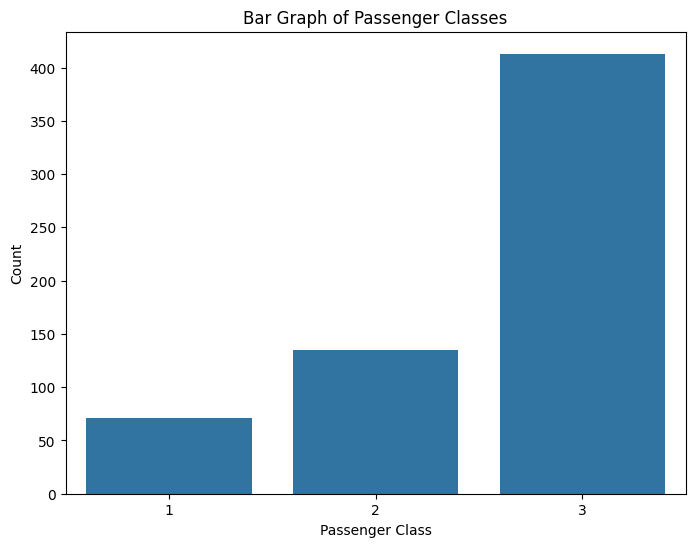

In [ ]:
# Bar graph for 'Pclass' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Bar Graph of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

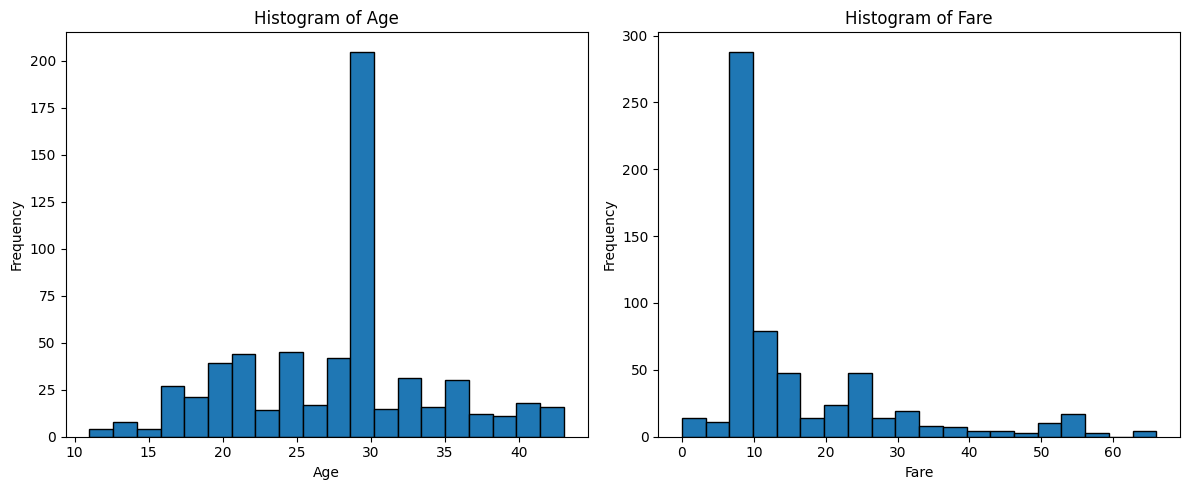

In [ ]:
# Assuming 'Age' and 'Fare' are the numerical columns you want to plot histograms for
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=20, edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


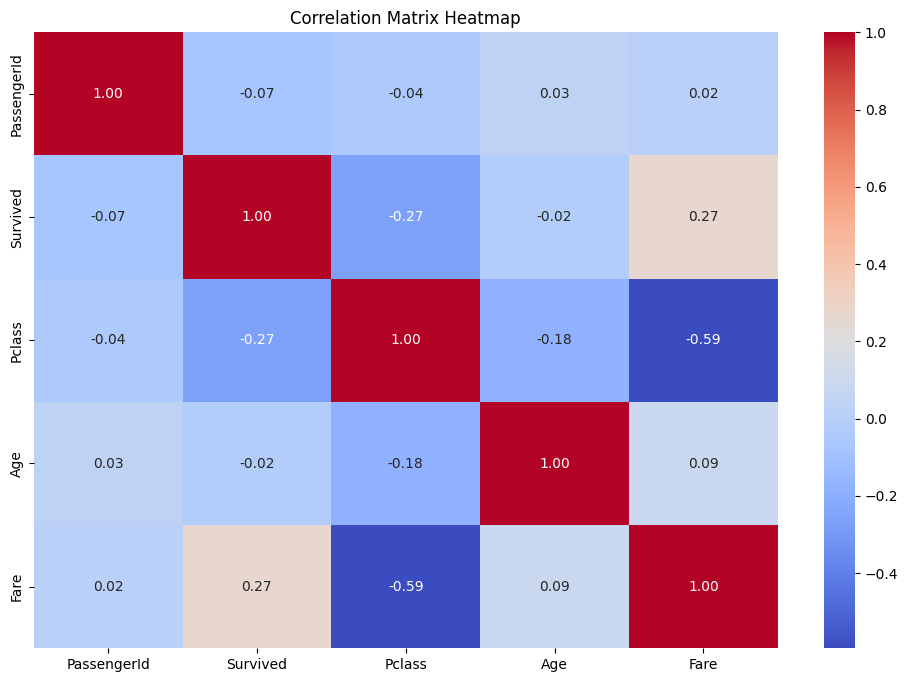

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Key Insights & Observations:

The dataset structure was explored using .info() and .describe(), giving an understanding of data types, missing values, and basic statistics.
Missing Values Handling:

Missing values were identified and handled using imputation or removal techniques.
If many values were missing in a column, they might have been dropped to avoid data bias.
Correlation Analysis:

A heatmap was generated to analyze numerical feature relationships.
Features with strong correlations could be useful for predictive modeling, while weakly correlated features may contribute less.
Categorical Variable Analysis:

Bar charts and value counts were used to explore distributions.
Certain categorical features, like Pclass and Sex in Titanic data, likely showed strong associations with survival rates.
Numerical Feature Distributions:

Histograms were plotted to analyze numerical variable distributions.
Outliers, skewness, or any significant patterns in age, fare, or other numeric features would have been identified.